In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('auto_clean.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [4]:
df.info

<bound method DataFrame.info of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
5            2                122         audi        std          two   
6            1                158         audi        std         four   
7            1                122         audi        std         four   
8            1                158         audi      turbo         four   
9            2                192          bmw        std          two   
10           0                192          bmw        std         four   
11           0                188          bmw        std          two   
12    

In [5]:
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
5            2                122         audi        std          two   
6            1                158         audi        std         four   
7            1                122         audi        std         four   
8            1                158         audi      turbo         four   
9            2                192          bmw        std          two   
10           0                192          bmw        std         four   
11           0                188          bmw        std          two   
12    

In [6]:
df.corr().T

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [7]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr() 

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


C:\Users\Choko Armani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56151.62626029121)

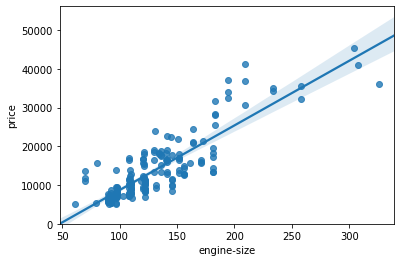

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [9]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [10]:
%%capture
! pip install seaborn

C:\Users\Choko Armani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


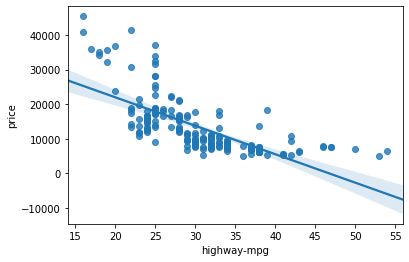

In [11]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [12]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


C:\Users\Choko Armani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


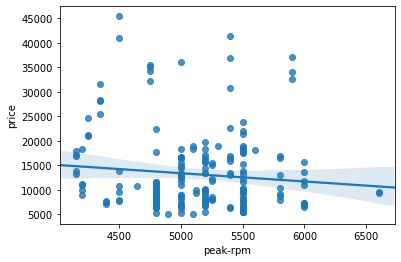

In [13]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [14]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [15]:
#The correlation is 0.0823, the non-diagonal elements of the table.
df[["stroke","price"]].corr() 

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


C:\Users\Choko Armani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


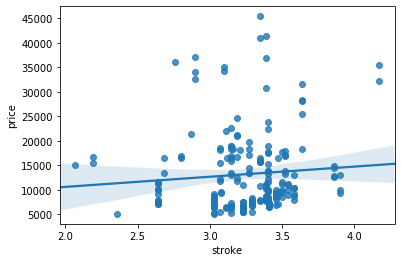

In [16]:
# There is a weak correlation between the variable 'stroke' and 'price.' 
# as such regression will not work well.  We can see this use "regplot" to demonstrate this.

sns.regplot(x="stroke", y="price", data=df)

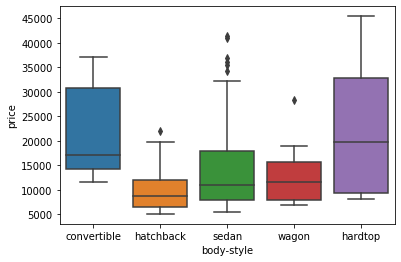

In [17]:
sns.boxplot(x="body-style", y="price", data=df)

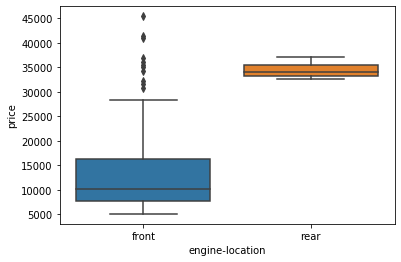

In [18]:
sns.boxplot(x="engine-location", y="price", data=df)

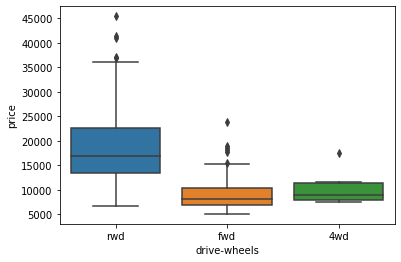

In [19]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000


In [21]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [23]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [25]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [26]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

In [27]:
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)

In [28]:
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [29]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [30]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts#.head(10)

,value_counts
engine-location,
front,198
rear,3


In [31]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [32]:
df_group_one = df[['drive-wheels','body-style','price']]

In [33]:
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [4]:
df.groupby??

Object `df.groupby` not found.


In [34]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [35]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Object `df.groupby` not found.


In [36]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [37]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [38]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


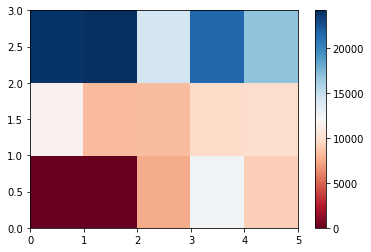

In [39]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

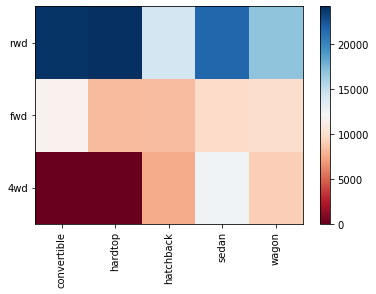

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

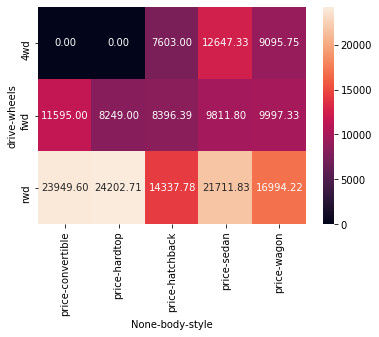

In [41]:
#plot using seaborn
sns.heatmap(grouped_pivot, annot=True, fmt='.2f')

In [42]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [43]:
#Scify stats values and pearson correlation

from scipy import stats

In [44]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight',
       'engine-size', 'bore', 'city-mpg', 'highway-mpg']

for col in cols: 
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print(f"The PearsonR between {col} and price is {pearson_coef} with a P-value of P = {p_value}")
    
    if p_value < 0.001:
        print(f'Correlation between {col} and price is statistically significant..')
    elif p_value < 0.05:
        print(f'Correlation between {col} and price is statistically moderate..')
    elif p_value < 0.1:
        print(f'Correlation between {col} and price is statistically weak..')
    else:
        print(f'Correlation between {col} and price is statistically not significant..')
        
    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print(f'Coeff ~{pearson_coef} shows that the relationship is positive and very strong.\n')
        elif pearson_coef > 0.75 :
            print(f'Coeff ~{pearson_coef} shows that the relationship is positive and quite strong.\n')
        elif pearson_coef > 0.60:
            print(f'Coeff ~{pearson_coef} shows that the relationship is positive and moderately strong.\n')
        elif pearson_coef > 0.50 :
            print(f'Coeff ~{pearson_coef} shows that the relationship is positive and only moderate.\n')
        else:
            print(f'Coefficient ~{pearson_coef} shows that the relationship is positive and weak.\n')
    else:
        if abs(pearson_coef) > 0.85:
            print(f'Coeff ~{pearson_coef} shows that the relationship is negative and very strong.\n')
        elif abs(pearson_coef) > 0.75 :
            print(f'Coeff ~{pearson_coef} shows that the relationship is negative and quite strong.\n')
        elif abs(pearson_coef) > 0.60:
            print(f'Coeff ~{pearson_coef} shows that the relationship is negative and moderately strong.\n')
        elif abs(pearson_coef) > 0.50 :
            print(f'Coeff ~{pearson_coef} shows that the relationship is negative and only moderate.\n')
        else:
            print(f'Coefficient ~{pearson_coef} shows that the relationship is negative and weak.\n')

The PearsonR between wheel-base and price is 0.5846418222655081 with a P-value of P = 8.076488270732955e-20
Correlation between wheel-base and price is statistically significant..
Coeff ~0.5846418222655081 shows that the relationship is positive and only moderate.

The PearsonR between horsepower and price is 0.8095745670036559 with a P-value of P = 6.36905742825998e-48
Correlation between horsepower and price is statistically significant..
Coeff ~0.8095745670036559 shows that the relationship is positive and quite strong.

The PearsonR between length and price is 0.690628380448364 with a P-value of P = 8.016477466159053e-30
Correlation between length and price is statistically significant..
Coeff ~0.690628380448364 shows that the relationship is positive and moderately strong.

The PearsonR between width and price is 0.7512653440522674 with a P-value of P = 9.200335510481426e-38
Correlation between width and price is statistically significant..
Coeff ~0.7512653440522674 shows that the

In [45]:
#ANOVA
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [47]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [48]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [49]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'], 
                              grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [50]:
#seperately rwd and fwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666
